In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
streamings = pd.read_json('plotify/dataset/StreamingHistory0.json')
features = pd.read_csv('streaming_audio_features.csv')

In [3]:
streamings['secPlayed'] = streamings['msPlayed']/1000
streamings

,endTime,artistName,trackName,msPlayed,secPlayed
0,2021-10-13 19:34,Noir Désir,Le vent nous portera,26408,26.408
1,2021-10-13 19:35,Chelsea Wolfe,Spinning Centers,85671,85.671
2,2021-10-13 19:37,Damien Rice,Cheers Darlin',0,0.000
3,2021-10-13 19:40,Brett Anderson,Back to You,158694,158.694
4,2021-10-13 19:44,Rothwell,Darling,226907,226.907
...,...,...,...,...,...
2826,2022-02-23 14:34,Sövkət Ələkbərova,Axşam,11778,11.778
2827,2022-02-23 14:34,Sleeping Pulse,The Blind Lead the Blind,349916,349.916
2828,2022-02-25 09:25,Carmody,Like That,133141,133.141
2829,2022-02-25 09:33,Carmody,Like That,99390,99.390


In [46]:
streamings['endTime'] = pd.to_datetime(streamings['endTime'])
streamings['date'] = streamings['endTime'].dt.date
streamings['time'] = streamings['endTime'].dt.time
streamings['hour'] = streamings['endTime'].dt.hour

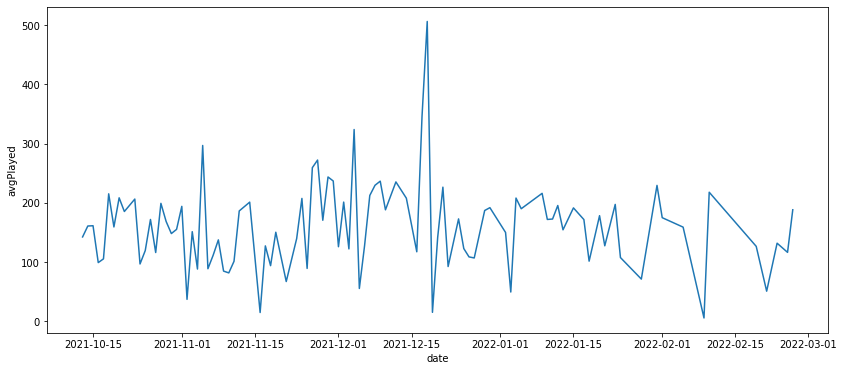

In [62]:
# time series of listening activities

avg_per_day = streamings.groupby(['date'], as_index=False)['secPlayed'].agg({'avgPlayed': 'mean'})

plt.figure(figsize=(14, 6))
sns.lineplot(x=avg_per_day['date'], y=avg_per_day['avgPlayed'])
plt.show()

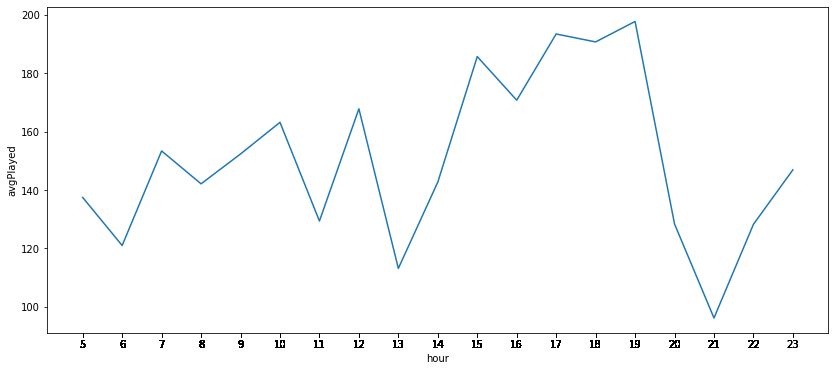

In [70]:
avg_per_hour = streamings.groupby(['hour'], as_index=False)['secPlayed'].agg({'avgPlayed': 'mean'})

plt.figure(figsize=(14, 6))
sns.lineplot(x=avg_per_hour['hour'], y=avg_per_hour['avgPlayed'])
plt.xticks(ticks=streamings.hour.values)
plt.show()